# <center>⏱ MACHINE LEARNING WORKFLOW </center> 
# <center>LOGISTIC CLASSFICATION </center> 
### <center>MULTIPLE REGRESSION SOLVED PROBLEM </center> 
 

#### 🔆 SPECIFIC OBJECTIVES

<hr>
<ol>
<li>Problem statement</li>
<li>Data collection</li>
<li>Exploratory Data Analysis</li>
<li>Data cleaning</li>
<li>Model selection & Training</li>
<li>Evaluation</li>
<li>Features selection</li>
<li>Hyperparameter tuning</li>
<li>prediction</li>
<li>Deployment</li> 
</ol>

 <hr>
    <li>Save and Load the model From Drive</li>
    <li>Coefficients</li>
    <li>Coefficients Correlations</li>

### <center> 1. PROBLEM STATEMENT </center>

<li> Verify clear understanding of the problem </li>
<li> State the problem in a simple way </li>
<li> state you assumptions about the problem solving </li>

The problem is about to create the machine learning Model to predict the likehood of the person to have diabetes or not based on the number of factors such as  Glucose Level, BloodPressure, SkinThickness, Insulin, BMI, Age. Finally the Model will find how far these factors influence diabetes as a general and one by one

> <li>This is Supevised - classification problem.</li>

> <li>Algorithms?</li>

> <li>Evaluation  ?</li>

####  <center> IMPORT NECESSARY LIBRARIES </center>

In [381]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

### <center> 2. DATA COLLECTION </center>

In [382]:
#loading datasets

df = pd.read_csv("diabetes.csv")

In [383]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


 ### <center> 3. EXPLORATORY DATA ANALYSIS</center>

This is the process of finding some insights from your dataset before create predictive models.
it involve the following-:
<hr>
 <li> The nature of dataset </li>   
 <li> Number of rows & columns </li> 
 <li> Outliers </li> 
 <li> Gaps </li> 
 <li> Measure of Dispersion (peak,skewness,Quartiles) </li> 
  
**Note:** This is important steps in your Data science workflow.

In [384]:
#show list of columns 

list(df.columns) 

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [385]:
# information about datasets

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


The outshow shows the list of variables , sizes and data types in each variables. This will help you to know what feature engineering you can apply.

In [386]:
# shape of dataset

df.shape

(768, 9)

In [387]:
# description of data

# df.describe()
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [388]:
# about our target column

df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [389]:
# Check for missing values

print('missing values:', df.isnull().sum())

missing values: Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


>We don't have missing data in our dataset.

**Note:** Incase there is missing values, suggested ways to deal with are:-
   
   **First case if there many[too much]**
   
  <li>Drop the entire column</li>
        
   **Second case if there moderate[half]**
   
   <li> You can decide to drop or to keep</li>
        
  <li> if you decide to keep the last options will be best to deal with</li>
  
 **Third case if there few**
<li>Fill/replace with mean of the specific column they belong</li>       
<li>Fill/replace with medium of the specific column they belong</li>       
<li>Fill/replace with mode of the specific column they belong</li>
<li>Fill/replace with  zero </li>      
<li>Fill/replace with high value e.g 99999 </li>      
<li>drop the rows which they belong</li>

### <center> 4. VISUALIZATION </center>

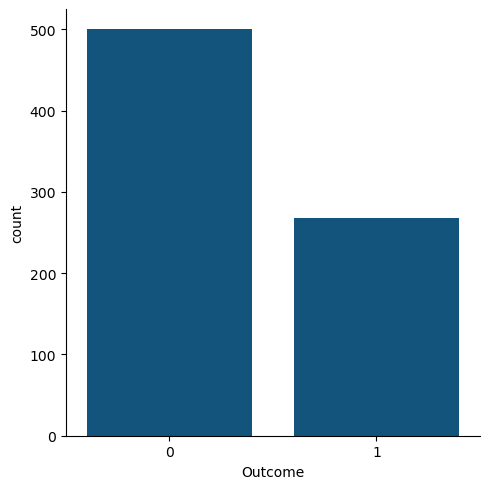

In [390]:
# Explore Target distribution 

sns.catplot(x="Outcome", kind="count", data=df, color="#00588E")

plt.show()

**Note** We can see classes are not well balanced, you can note as challenge to work with or discard it

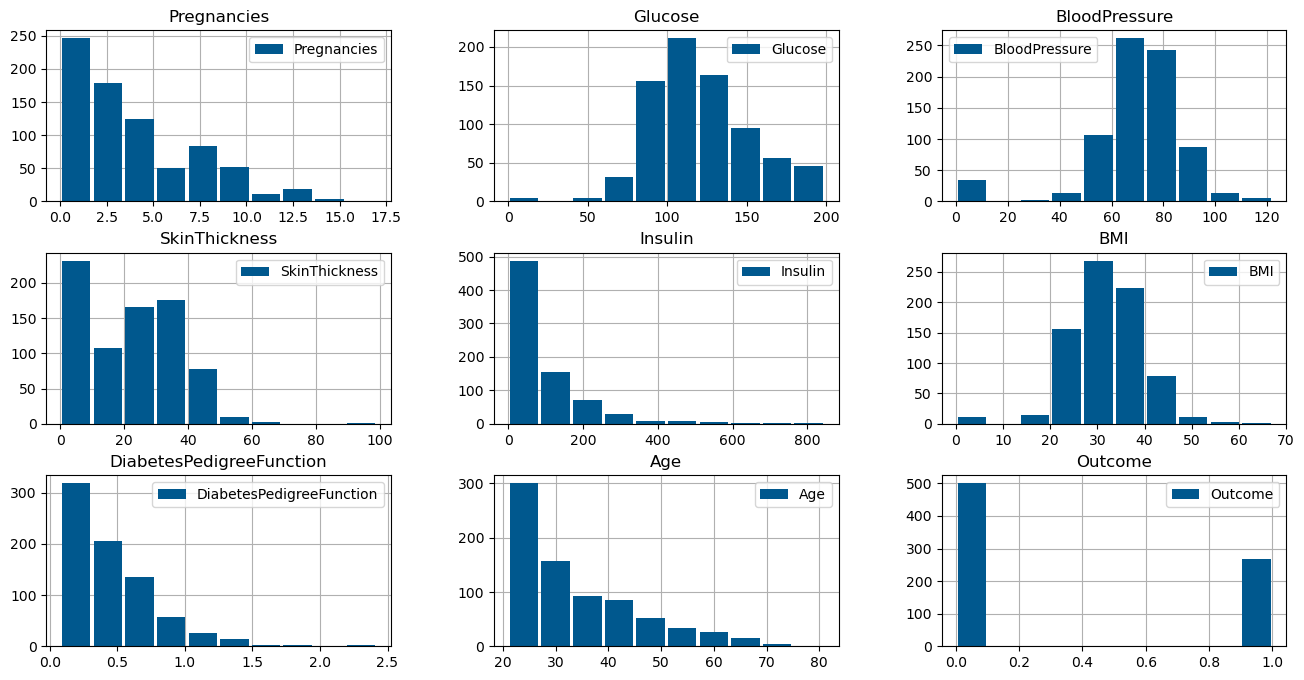

In [391]:
# histogram

df.hist(figsize=(16,8),color='#00588E', zorder=2, rwidth=0.9,legend = ['Outcome']);

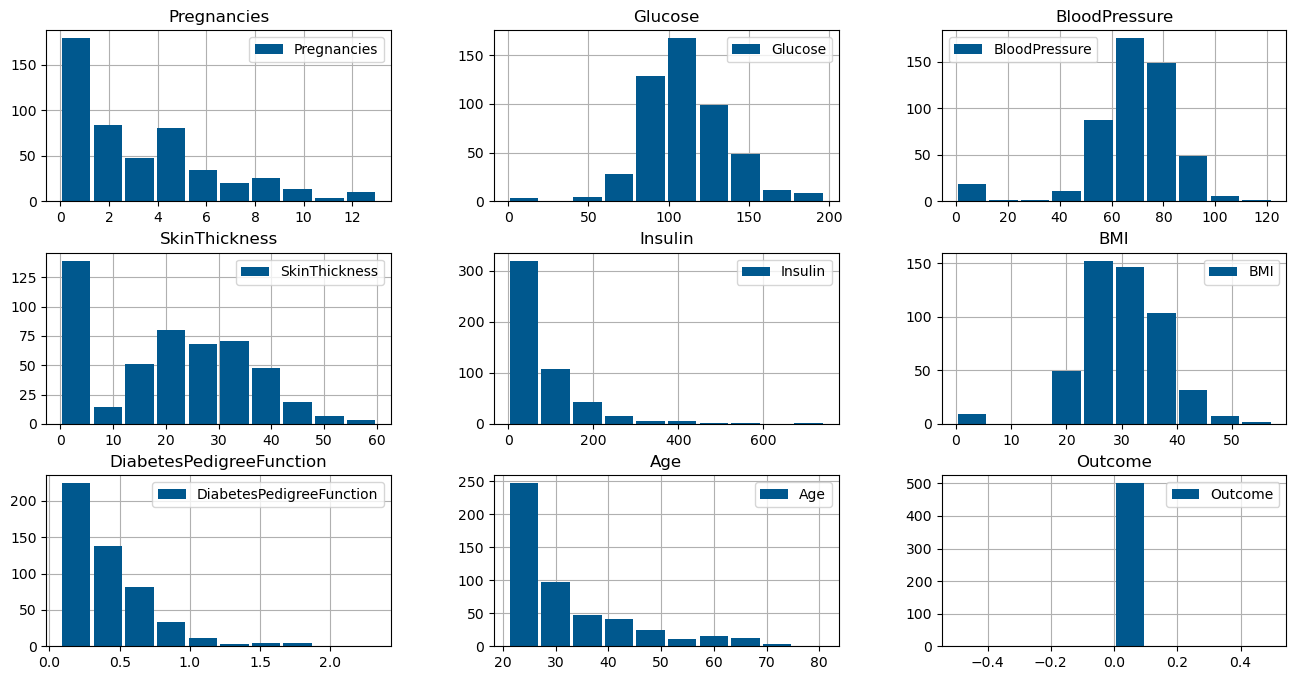

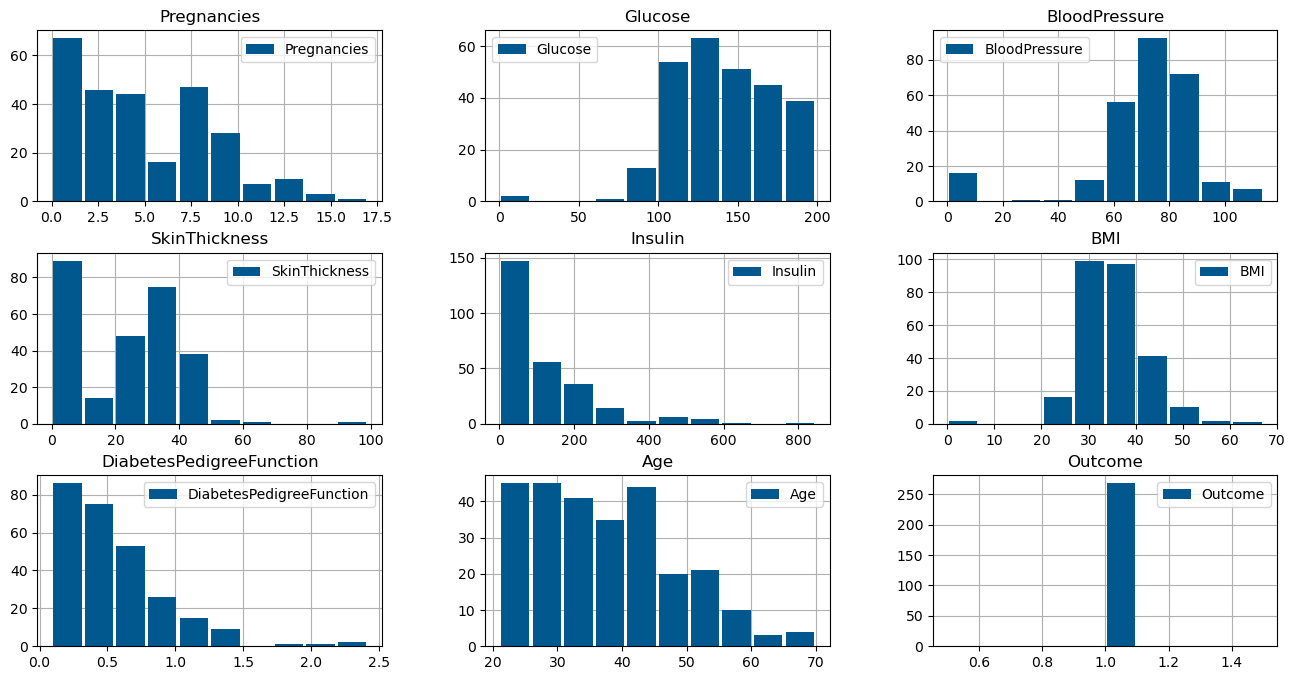

In [392]:
# histogram by grouping using target column

df.groupby('Outcome').hist(figsize=(16,8),color='#00588E', zorder=2, rwidth=0.9,legend = ['Outcome']);

### <center> 5. DATA CLEANING </center>

> **Note** First thing to deal with is null values for our case found no missing values

> **Check for outliers**

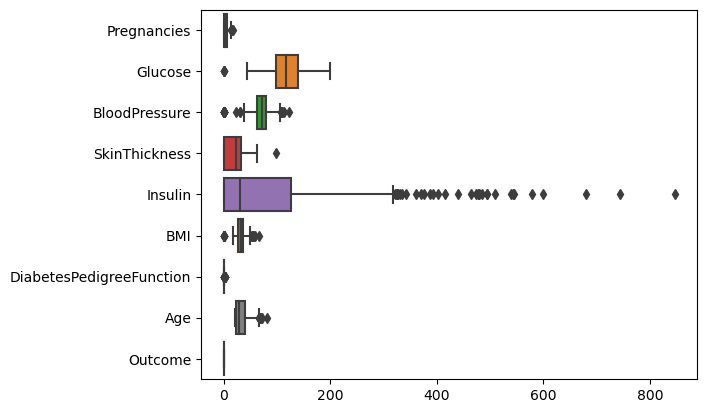

In [394]:
fig, ax = plt.subplots()
sns.boxplot(data=df, orient='h')
plt.show()

> **Dealing with outliers**

In [395]:
#finding Quartiles range deviation (maxIQR-minIQR)
Q3, Q1 = np.percentile(df['Insulin'], [75, 25])
iqr = Q3 - Q1
whisker = Q3 + (1.5*iqr)
print('Inter quatile range: ', iqr)
print('Whisker            : ', whisker)

df['Insulin'] = df['Insulin'].clip(upper=whisker)

Inter quatile range:  127.25
Whisker            :  318.125


>visualize final output

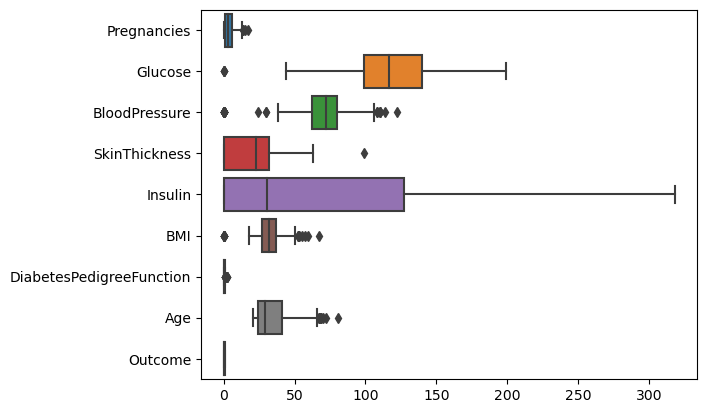

In [396]:
fig, ax = plt.subplots()
sns.boxplot(data=df, orient='h')
plt.show()

**Note:** Incase your data contain categorical features:-

**Methods to deal with categorical features**

<li>By using Mapping method</li>
e.g mapping_dict={"PClass":{"1st":1,"2nd":2,"3rd":3}}

  dataset.replace(mapping_dict,inplace=True)

<li>By using one hot encoding method </li>

<li>By using frequency method</li>

<li>By using get dummies method</li>

Others:

> **Remember..**

> After cleaning your data now you can figure out on how to generate new feature , Data types convertion int -float etc [Feature engineering in deep from insights you get]

### <center> 6. MODELLING </center>
<hr>
<li> Features: Independent Variables (x) </li>
<li> Target Dependent Variables</li>

In [397]:
features = ['Pregnancies', 'Glucose', 'BloodPressure', 
            'SkinThickness', 'Insulin','BMI', 
            'DiabetesPedigreeFunction', 'Age']

target = ['Outcome']

x = df[features]
y = df[target]

In [398]:

from sklearn.linear_model  import LogisticRegression
from sklearn.model_selection import train_test_split

In [399]:
SEED=200
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=SEED)
print (x_train.shape, y_train.shape)
print (x_test.shape, y_test.shape)

(614, 8) (614, 1)
(154, 8) (154, 1)


In [400]:
model=LogisticRegression()
model.fit(x_train,y_train)
print(model)

LogisticRegression()


In [401]:
y_pred=model.predict(x_test)

In [402]:
print(model)

LogisticRegression()


In [403]:
y_pred=model.predict(x_test)

### <center> 7. EVALUATION </center>

In [404]:
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix

In [405]:
# Evaluation

print("general accuracy score :", accuracy_score(y_test,y_pred))

general accuracy score : 0.8441558441558441


**Note** Other Evaluation metrics for classification problem are:-
<li>F1-score</li>
<li>Recall</li>
<li>confusion matrix</li>
<li>Log loss etc..</li>

### <center> 8. FEATURE SELECTION </center>

Here is how we’re fitting logistic regression. Setting the threshold at 0.5 assumes that we’re not making trade-offs for getting false positives or false negatives, that there normally is a 50% chance to survive.

In [406]:
model.predict(x_test)

array([1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
      dtype=int64)

This returns the discrete approximation of zeros and ones. We’re going to manually show how this array is derived:

The below prints the probability for each row/person in the test set on their survival, specifically the probability that they did not survive, and the probability that they did survive; both numbers adding to 1.

In [407]:
model.predict_proba(x_test)[:,1]

array([0.73502879, 0.2620775 , 0.12822431, 0.44608064, 0.48339388,
       0.317021  , 0.70339878, 0.45519174, 0.61760117, 0.56036442,
       0.28703731, 0.12315236, 0.82298988, 0.94570955, 0.34806185,
       0.92130877, 0.93659335, 0.93927235, 0.44838672, 0.16558058,
       0.66056312, 0.13290891, 0.27831714, 0.02951199, 0.36898725,
       0.53608699, 0.30485822, 0.23911158, 0.03482531, 0.25408952,
       0.27639781, 0.15041563, 0.11255822, 0.34247427, 0.12586726,
       0.19545756, 0.34427125, 0.03956844, 0.09810548, 0.75252284,
       0.97159535, 0.05103354, 0.62694875, 0.22843265, 0.14308878,
       0.34756251, 0.19628201, 0.76615762, 0.09256475, 0.87714241,
       0.79791454, 0.2710109 , 0.43644068, 0.01246498, 0.68212677,
       0.17535878, 0.14567495, 0.87440355, 0.30498291, 0.07174857,
       0.32576645, 0.29886273, 0.13197079, 0.10426291, 0.80442718,
       0.18841703, 0.05556263, 0.34817251, 0.20436553, 0.11778246,
       0.17621455, 0.45280581, 0.74329974, 0.2589252 , 0.67016

We can then see the range of how our scores are doing:

> The coefficients in a logistic regression model represent the strength and direction of the relationship between each independent variable and the log-odds of the dependent variable. Here's how you can use coefficient values to assess the impact of independent variables:

> Remember that interpreting coefficients is crucial for understanding how each independent variable contributes to the logistic regression model's predictions.

> Here's an example of how you might interpret the coefficients for a logistic regression model:

In [408]:
coefficients = model.coef_[0]

In [409]:
for i in range(len(coefficients)):
    print(f"Variable {i + 1}: Coefficient = {coefficients[i]}")


Variable 1: Coefficient = 0.11686314125794664
Variable 2: Coefficient = 0.03393270809365018
Variable 3: Coefficient = -0.01017511433279654
Variable 4: Coefficient = 0.00031866812092738587
Variable 5: Coefficient = -0.0014072926883008268
Variable 6: Coefficient = 0.08063203133481261
Variable 7: Coefficient = 1.305734962032729
Variable 8: Coefficient = 0.009742646884446511


After fiting data into the model, we can then get the selected features using grid_scores_ attribute which give the accuracy of each selected feature. After which we can look on the selected features.

We are now set to do a comparison between a model trained on initial features and the one trained on RFECV selected features.

### <center> 9. PREDICTION </center>

> Now is the time to use your test data to predict the desired outputs

### <center>10. DEPLOYMENT </center>

> Before deployment make sure your model is saved well

> **Saving Model**

> [Joblib](https://pypi.org/project/joblib/) is a part of Scipy Ecosystem which provide utilities for saving and loading Python Objects having NumPy data structures. <br>
Scikit Learn provide implementation of Joblib for saving and loading model.

In [410]:
import joblib

In [411]:
model_name = 'logistic_regression_model.pkl'
path = 'demo/'+model_name

In [412]:
# save the model to disk
# filename = 'finalized_model_joblib.pkl'
joblib.dump(model, path)
 
# some time later...
 
# load the model from disk
loaded_model = joblib.load(path)
result = loaded_model.score(x_test, y_test)

In [413]:
print(result*100)

84.4155844155844


> **Deployment**

After trining a model, it is desirable  to have a way to persist a model in standard format and deploy them into website or other platforms for future use without the need to retrain them. <br>
[Flask](https://palletsprojects.com/p/flask/) is a lightweight web application framework written in Python for developing small scale websites <br>
Install `pip install flask` or `conda install flask`

other deployment frameworks:
<li>Django</li>
<li>cloud services such as Azure,google & AWS</li>

# <center>NB:  THE COEFFICIENT AND COEFFICIENT OF CORRELATION  </center>

> In logistic regression, the term "coefficient" and "coefficient correlation" are not typically used interchangeably, and they have different interpretations:

> **Coefficient** (Coefficient of a feature): In logistic regression, the coefficient (often referred to as the weight or parameter) associated with each feature represents the effect of that feature on the predicted log-odds (logit) of the binary outcome. These coefficients determine the impact of each feature on the likelihood of the binary outcome. A positive coefficient indicates that as the feature increases, the log-odds of the outcome also increase, while a negative coefficient suggests that as the feature increases, the log-odds decrease.

> **Correlation:** Correlation typically refers to a statistical measure of the strength and direction of a linear relationship between two continuous variables. In logistic regression, it's not used in the same way as coefficients. Correlation measures relationships between pairs of variables, which can be useful for understanding the linear association between two continuous features. However, logistic regression primarily deals with categorical outcomes and their relationship with predictor variables.

> So, while both coefficients and correlation involve assessing relationships between variables, they serve different purposes and are used in different contexts. Coefficients in logistic regression are specifically tailored to modeling binary or categorical outcomes, whereas correlation is a more general concept applicable to relationships between continuous variables.

> ### <center>A:  THE COEFFICIENT  | LOAD MODEL FROM DRIVE  </center>

                    Feature  Coefficient
0               Pregnancies     0.116863
1                   Glucose     0.033933
2             BloodPressure    -0.010175
3             SkinThickness     0.000319
4                   Insulin    -0.001407
5                       BMI     0.080632
6  DiabetesPedigreeFunction     1.305735
7                       Age     0.009743


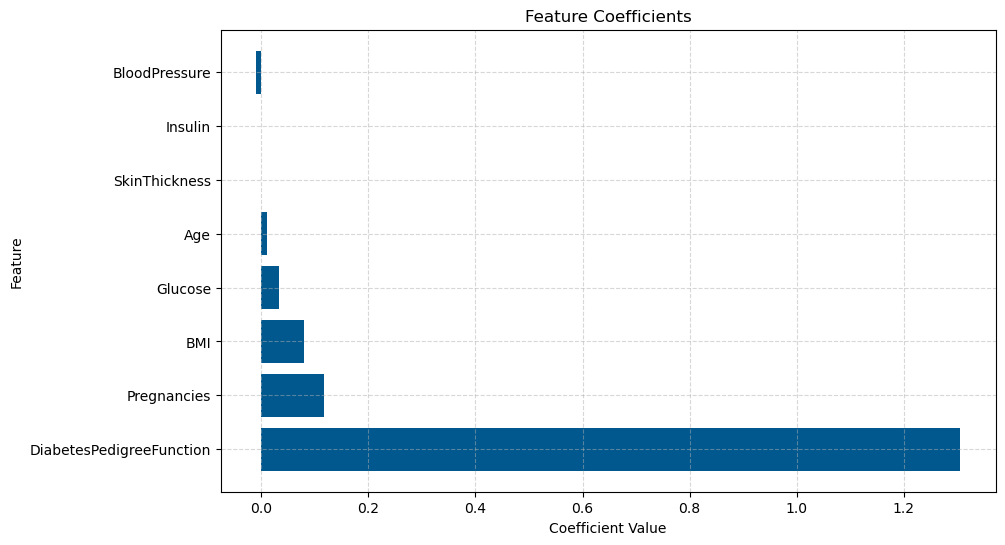

In [438]:
model = joblib.load(path)

data = {
    'Pregnancies': [4],
    'Glucose': [41],
    'BloodPressure': [5],
    'SkinThickness': [42],
    'Insulin': [32],
    'BMI': [23],
    'DiabetesPedigreeFunction': [4],
    'Age': [30],
    # Add more features as needed
}

# Create a DataFrame
input_data = pd.DataFrame(data)
coefficients = model.coef_[0]
coefficients_df = pd.DataFrame({'Feature': input_data.columns, 'Coefficient': coefficients})
print(coefficients_df)

# Sort the coefficients in descending order to plot them
coefficients_df = coefficients_df.sort_values(by='Coefficient', ascending=False)

# Create the bar graph

plt.figure(figsize=(10, 6))
plt.barh(coefficients_df['Feature'], coefficients_df['Coefficient'],color="#00588E",)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Coefficients')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


 

> ### <center>B:  THE COEFFICIENT  | USE MODEL FROM THIS ANALYSIS </center>

Coefficient for feature 1: 0.11686314125794664
Coefficient for feature 2: 0.03393270809365018
Coefficient for feature 3: -0.01017511433279654
Coefficient for feature 4: 0.00031866812092738587
Coefficient for feature 5: -0.0014072926883008268
Coefficient for feature 6: 0.08063203133481261
Coefficient for feature 7: 1.305734962032729
Coefficient for feature 8: 0.009742646884446511
Intercept: [-8.05790195]


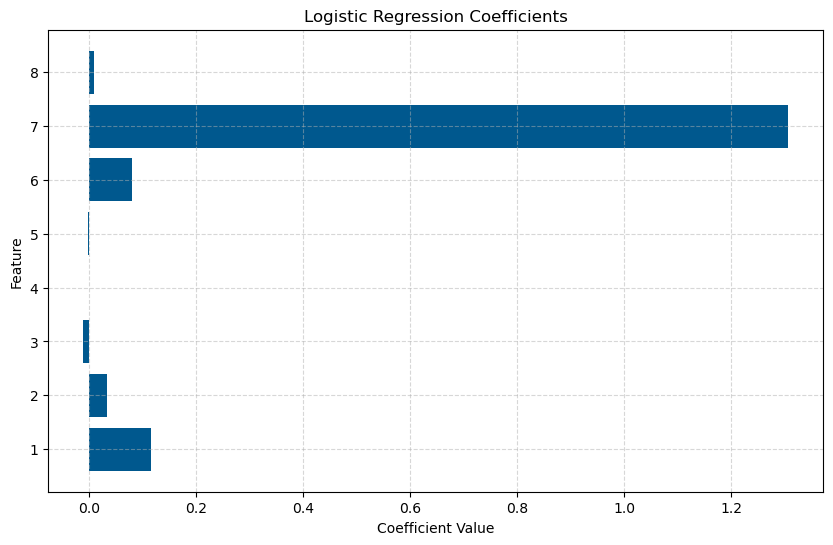

In [439]:


# Now, you can predict with the trained model
X_test = np.array([[4,4,4,4,4,4,4,4]])  # Replace with your actual feature values
predictions = model.predict(X_test)

# Display the coefficients
coefficients = model.coef_[0]
intercept = model.intercept_

for i, coef in enumerate(coefficients):
    print(f"Coefficient for feature {i + 1}: {coef}")

print(f"Intercept: {intercept}")

# Create a bar plot to visualize the coefficients
coeff_df = pd.DataFrame({'Feature': range(1, len(coefficients) + 1), 'Coefficient': coefficients})
coeff_df = coeff_df.sort_values(by='Coefficient')

plt.figure(figsize=(10, 6))
plt.barh(coeff_df['Feature'], coeff_df['Coefficient'],color="#00588E")
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Logistic Regression Coefficients')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

> ### <center>C:  THE COEFFICIENT OF CORRELATION | USE MODEL FROM THIS ANALYSIS </center>

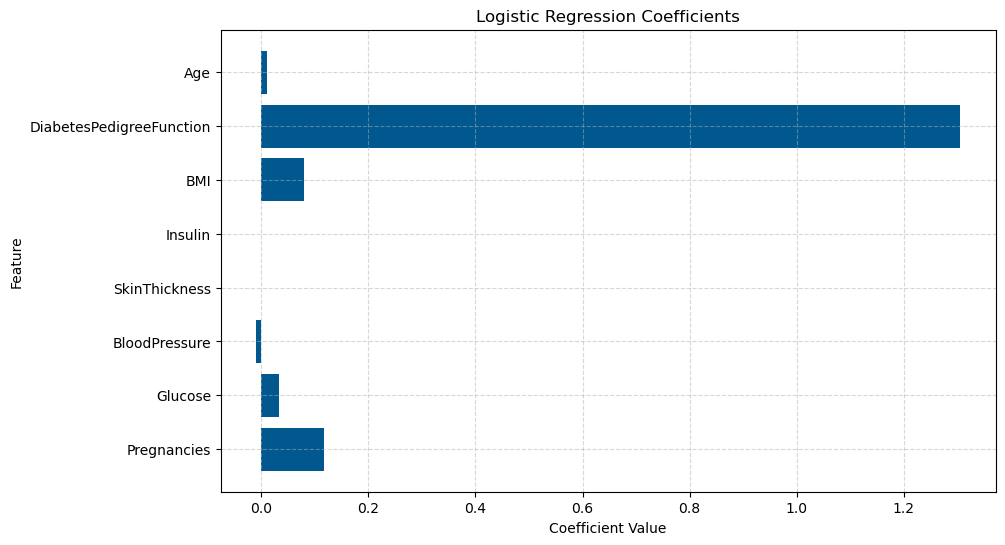

In [442]:
# Load the feature values as a numpy array
X_test = np.array([[4,4,4,4,4,4,4,4]])  # Replace with your actual feature values

# Define your feature names in the same order
feature_names = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']  # Replace with your feature names
# Assuming you already have a trained logistic regression model named 'model'
predictions = model.predict(X_test)
# Get the coefficients
coefficients = model.coef_[0]
plt.figure(figsize=(10, 6))
plt.barh(feature_names, coefficients,color="#00588E")
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Logistic Regression Coefficients')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()



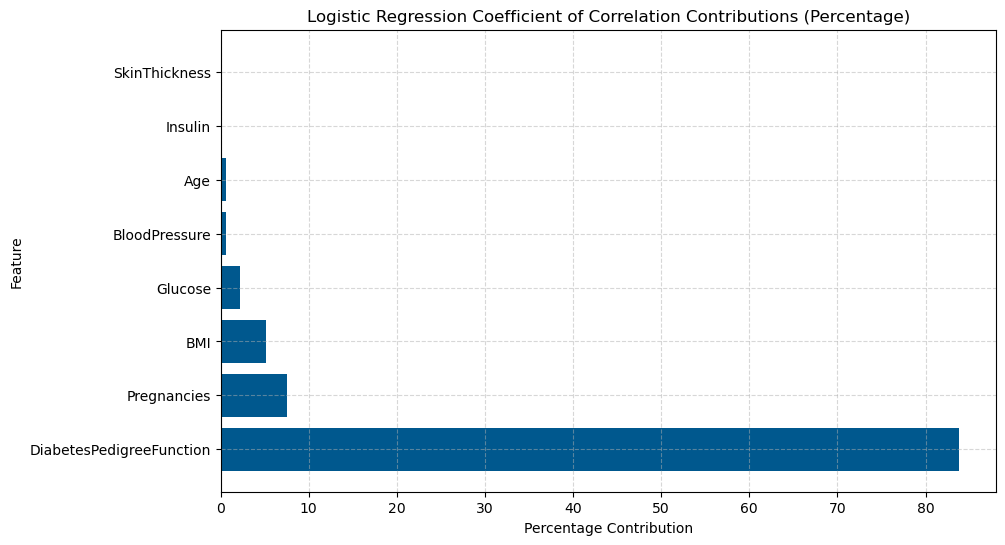

In [443]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Assuming you have a trained logistic regression model named 'model'
# and you have your feature values and feature names

# Load your feature values as a numpy array
X_test = np.array([[4,4,4,4,4,4,4,4]])  # Replace with your actual feature values

# Define your feature names in the same order
feature_names = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']  # Replace with your feature names

# Make predictions using the trained model
predictions = model.predict(X_test)

# Get the coefficients from the model
coefficients = model.coef_[0]

# Calculate the percentage contribution of each coefficient to the prediction
total_contribution = np.sum(np.abs(coefficients))
percentage_contributions = np.abs(coefficients) / total_contribution * 100

# Create a DataFrame to store feature names and percentage contributions
contributions_df = pd.DataFrame({'Feature': feature_names, 'Percentage Contribution': percentage_contributions})

# Sort the DataFrame by percentage contributions
contributions_df = contributions_df.sort_values(by='Percentage Contribution', ascending=False)

# Create a bar plot to visualize the coefficients as percentages
plt.figure(figsize=(10, 6))
plt.barh(contributions_df['Feature'], contributions_df['Percentage Contribution'],color="#00588E")
plt.xlabel('Percentage Contribution')
plt.ylabel('Feature')
plt.title('Logistic Regression Coefficient of Correlation Contributions (Percentage)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


<li>my GitHub reference source code
https://github.com/shamiraty?tab=repositories</li>

<li>contact:  WhatsApp +255675839840</li>
<li>email:  sashashamsia@gmail.com</li>
<li>playstore:  https://play.google.com/store/apps/dev?id=7334720987169992827&hl=en&gl=US</li>
<li>telegram: +255656848274</li>

